In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from numpy import linalg as LA
# Set default font size for plots:
font = {'size'   : 20}
plt.rc('font',**font)

def extension_failure(sigma3,T,sigmav):
    return (sigma3+T)/sigmav

def hybrid_shear_failure(diffP,sigma1,sigma3,T,sigmav):
    return (8*T*(sigma1+sigma3)-(diffP)**2)/(16*T*sigmav)

def brittle_shear_failure(diffP,sigma1,sigma3,T,C,mu,sigmav):
    theta2=(90+np.arctan(mu)*180/np.pi)*np.pi/180
    c1=(1+np.cos(theta2))/np.cos(theta2)
    c3=(1-np.cos(theta2))/np.cos(theta2)
    return (1/(2*sigmav))*(-2*C*np.tan(theta2)+c1*sigma1-sigma3*c3)

def lambdav_diffP(C,T,mu,h):
    '''Input: lambdav_diffP(C=10e6,T=5e6,mu=0.75,h=10000)
    Funcion for the interactive plot'''
    #Input parameters
    rho=2670
    rhow=1000
    g=9.8
    sig_v=rho*g*h
    sig_h=rhow*g*h
    C=C*1e6
    T=T*1e6
    bl=2*C/np.sin(theta2)
    ######################### TECTONIC REGIMES ####################################
    ####################### 1. REVERSE FAULTING ###################################
    diffP=np.linspace(0,300,3000)*1e6
    sigma3=sig_v
    sigma1=diffP+sigma3
    #Extension failure
    lv=extension_failure(sigma3,T,sig_v)
    ef=np.where(diffP<4*T)[0]
    lv=lv*np.ones(len(ef))
    fig=plt.figure('Pore fluid factor vs. diff. stress',figsize=(8,12.9))
    ax = fig.add_subplot(111)
    ax.plot(diffP[ef]*1e-6,lv,c='r',lw=2,ls='-')
    #Hybrid extensional-shear failure
    lamv=hybrid_shear_failure(diffP,sigma1,sigma3,T,sig_v)
    hesf=np.where((diffP>=4*T)&(diffP<bl))[0]
    plt.plot(diffP[hesf]*1e-6,lamv[hesf],c='g',lw=2,ls='-')
    #Brittle Shear Failure
    lam=brittle_shear_failure(diffP,sigma1,sigma3,T,C,mu,sig_v)
    bsf=np.where(diffP>=bl)[0]
    plt.plot(diffP[bsf]*1e-6,lam[bsf],c='b',lw=2,ls='-',label='reverse')
    ###############################################################################
    ####################### 2. NORMAL FAULTING ####################################
    sigma1=sig_v
    sigma3=sigma1-diffP
    #Extension failure 
    lv=extension_failure(sigma3,T,sig_v)#(sigma3+T)/sig_v
    ef=np.where(diffP<4*T)[0]
    ax.plot(diffP[ef]*1e-6,lv[ef],c='r',lw=2,ls='--')
    #Hybrid extensional-shear failure
    lamv=hybrid_shear_failure(diffP,sigma1,sigma3,T,sig_v)
    hesf=np.where((diffP>=4*T)&(diffP<bl))[0]
    ax.plot(diffP[hesf]*1e-6,lamv[hesf],c='g',lw=2,ls='--')
    #Brittle Shear Failure
    lam=brittle_shear_failure(diffP,sigma1,sigma3,T,C,mu,sig_v)
    bsf=np.where(diffP>=bl)[0]
    ax.plot(diffP[bsf]*1e-6,lam[bsf],c='b',lw=2,ls='--',label='normal')
    ###############################################################################
    ######################## 3. STRIKE-SLIP FAULTING ##############################
    sigma3=sig_v-diffP/2
    sigma1=sig_v+diffP/2
    #Extension failure 
    lv=extension_failure(sigma3,T,sig_v)#(sigma3+T)/sig_v
    ef=np.where(diffP<4*T)[0]
    ax.plot(diffP[ef]*1e-6,lv[ef],c='r',lw=2,ls=':')
    #Hybrid extensional-shear failure
    lamv=hybrid_shear_failure(diffP,sigma1,sigma3,T,sig_v)
    hesf=np.where((diffP>=4*T)&(diffP<bl))[0]
    ax.plot(diffP[hesf]*1e-6,lamv[hesf],c='g',lw=2,ls=':')
    #Brittle Shear Failure
    lam=brittle_shear_failure(diffP,sigma1,sigma3,T,C,mu,sig_v)
    bsf=np.where(diffP>=bl)[0]
    ax.plot(diffP[bsf]*1e-6,lam[bsf],c='b',lw=2,ls=':',label='strike-slip')
    ##############################################################################
    plt.axis([0,300,0,1.1])
    plt.ylabel('$\lambda_V$')
    plt.xlabel('$\sigma_1-\sigma_3$, MPa')
    ax.axvline(4*T*1e-6,0,1.1,ls='--',lw=1)
    ax.axvline(bl*1e-6,0,1.1,ls='--',lw=1)
    ax.axhline(sig_h/sig_h,0,300,ls='--',lw=1) #Lythostatic
    ax.axhline(sig_h/sig_v,0,300,ls='--',lw=1) #Hydrostatic
    ax.text(120,sig_h/sig_h,'lythostatic $P_f$',fontsize=12)
    ax.text(200,sig_h/sig_v,'hydrostatic $P_f$',fontsize=12)
    ax.text(4*T*1e-6,0.1,'$4T$',horizontalalignment='center',rotation=90,fontsize=12)
    plt.legend()
    plt.show()
    return

# Influence of fluid pressure and stress states on brittle failure modes in intact rock

There will be three main types of failure under compressive stress states driven by fluid pressure ($P_f$), namely: extensional failure, hybrid extensional-shear failure, and brittle shear failure.

## Extensional failure

Extension fractures occur only when the fluid pressure ($P_f$) is as large as the minimal stress and the rock's tensile stress ($T$) combined:

$$P_f = \sigma_3 + T$$

which in terms of pore fluid factor ($\lambda_V$) becomes:

$$\lambda_V = \frac{\sigma_3 + T}{\sigma_v}$$

where $\sigma_v$ is the overburden's stress to a desired depth of estimation.

## Hybrid extensional-shear failure

Under effective normal stresses $-T < \sigma_n' < 0$, the hybrid extensional-shear failure condition is approximated by the Griffith failure criterion:

$$(\sigma_1+\sigma_3)^2 = 8T(\sigma_1'+\sigma_3')$$

$$P_f = \frac{8T(\sigma_1'+\sigma_3')-(\sigma_1+\sigma_3)^2}{16T} $$

$$\lambda_V = \frac{8T(\sigma_1'+\sigma_3')-(\sigma_1+\sigma_3)^2}{16T\sigma_v} $$

## Brittle shear failure

This kind of failure happens at differential pressures $\ge5.7T$ and when shear stress ($\tau$) becomes equal to shear strength ($\tau_f$).

$$\tau_f = C + \mu_i(\sigma_n -P_f)$$

with $C$ being the cohesive strength and $\mu_i$ being the coefficient of internal friction.

Cox (2010) has some typos in the equation (Eq. 4 in the paper).  The typo on Equation 2 of Cox (2010) leads to the following expression for the pore fluid factor:

$$\lambda_V = \frac{1}{2\sigma_v}\left[2 C tan(2\theta_{opt}) - \left( \frac{1-cos(2\theta_{opt})}{cos(2\theta_{opt})} \right) \sigma_1  + \left( \frac{1+cos(2\theta_{opt})}{cos(2\theta_{opt})} \right) \sigma_3 \right]$$

The correct expression to use is:

$$\lambda_V = \frac{1}{2\sigma_v}\left[\left( \frac{1+cos(2\theta_{opt})}{cos(2\theta_{opt})} \right) \sigma_1  - \left( \frac{1-cos(2\theta_{opt})}{cos(2\theta_{opt})} \right) \sigma_3 - 2 C tan(2\theta_{opt})\right]$$

where $\theta_{opt}$ is the angle of optimally oriented faults

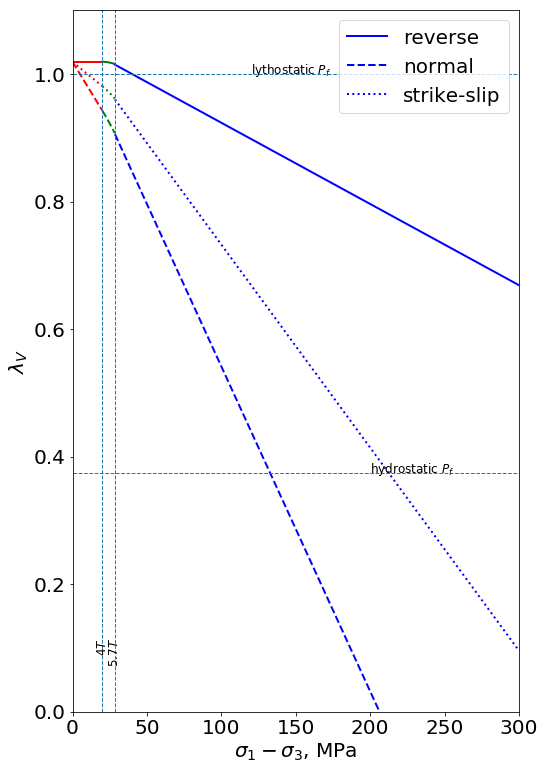

In [32]:
#Input parameters
rho=2670
rhow=1000
g=9.8
h=10000
sig_v=rho*g*h
sig_h=rhow*g*h
mu=0.75
C=10e6
T=5e6
theta2=(90+np.arctan(mu)*180/np.pi)*np.pi/180

######################### TECTONIC REGIMES ####################################
####################### 1. REVERSE FAULTING ###################################
diffP=np.linspace(0,300,3000)*1e6
sigma3=sig_v
sigma1=diffP+sigma3

#Extension failure
lv=extension_failure(sigma3,T,sig_v)
ef=np.where(diffP<4*T)[0]
lv=lv*np.ones(len(ef))

fig=plt.figure('Pore fluid factor vs. diff. stress',figsize=(8,12.9))
ax = fig.add_subplot(111)
ax.plot(diffP[ef]*1e-6,lv,c='r',lw=2,ls='-')
#
#Hybrid extensional-shear failure
lamv=hybrid_shear_failure(diffP,sigma1,sigma3,T,sig_v)
hesf=np.where((diffP>=4*T)&(diffP<5.7*T))[0]
plt.plot(diffP[hesf]*1e-6,lamv[hesf],c='g',lw=2,ls='-')

#Brittle Shear Failure
lam=brittle_shear_failure(diffP,sigma1,sigma3,T,C,mu,sig_v)

bsf=np.where(diffP>=5.7*T)[0]
plt.plot(diffP[bsf]*1e-6,lam[bsf],c='b',lw=2,ls='-',label='reverse')

####################### 2. NORMAL FAULTING ####################################
sigma1=sig_v
sigma3=sigma1-diffP
#Extension failure 
lv=extension_failure(sigma3,T,sig_v)
ef=np.where(diffP<4*T)[0]
#lv=lv*np.ones(len(ef))
ax.plot(diffP[ef]*1e-6,lv[ef],c='r',lw=2,ls='--')
#
#Hybrid extensional-shear failure
lamv=hybrid_shear_failure(diffP,sigma1,sigma3,T,sig_v)
hesf=np.where((diffP>=4*T)&(diffP<5.7*T))[0]
ax.plot(diffP[hesf]*1e-6,lamv[hesf],c='g',lw=2,ls='--')

#Brittle Shear Failure
lam=brittle_shear_failure(diffP,sigma1,sigma3,T,C,mu,sig_v)

bsf=np.where(diffP>=5.7*T)[0]
ax.plot(diffP[bsf]*1e-6,lam[bsf],c='b',lw=2,ls='--',label='normal')

######################## 3. STRIKE-SLIP FAULTING ##############################
sigma3=sig_v-diffP/2
sigma1=sig_v+diffP/2
#
#Extension failure 
lv=extension_failure(sigma3,T,sig_v)
ef=np.where(diffP<4*T)[0]
ax.plot(diffP[ef]*1e-6,lv[ef],c='r',lw=2,ls=':')
#
#Hybrid extensional-shear failure
lamv=hybrid_shear_failure(diffP,sigma1,sigma3,T,sig_v)
hesf=np.where((diffP>=4*T)&(diffP<5.7*T))[0]
ax.plot(diffP[hesf]*1e-6,lamv[hesf],c='g',lw=2,ls=':')

#Brittle Shear Failure
lam=brittle_shear_failure(diffP,sigma1,sigma3,T,C,mu,sig_v)

bsf=np.where(diffP>=5.7*T)[0]
ax.plot(diffP[bsf]*1e-6,lam[bsf],c='b',lw=2,ls=':',label='strike-slip')

plt.axis([0,300,0,1.1])
plt.ylabel('$\lambda_V$')
plt.xlabel('$\sigma_1-\sigma_3$, MPa')

ax.axvline(4*T*1e-6,0,1.1,ls='--',lw=1)
ax.axvline(5.7*T*1e-6,0,1.1,ls='--',lw=1)
ax.axhline(sig_h/sig_h,0,300,ls='--',lw=1) #Lythostatic
ax.axhline(sig_h/sig_v,0,300,ls='--',lw=1) #Hydrostatic
ax.text(120,sig_h/sig_h,'lythostatic $P_f$',fontsize=12)
ax.text(200,sig_h/sig_v,'hydrostatic $P_f$',fontsize=12)
ax.text(4*T*1e-6,0.1,'$4T$',horizontalalignment='center',rotation=90,fontsize=12)
ax.text(5.7*T*1e-6,0.1,'$5.7T$',horizontalalignment='center',rotation=90,fontsize=12)
plt.legend()
plt.show()

# Interactive plot

The sliders help vary the constants of the medium with the differential pressure ($diffP$) going from $0$ to $300~MPa$. 

### Normal failure conditions

The maximum stress ($\sigma_1$) is equal to the vertical stress ($\sigma_v$).

$$\sigma_1=\sigma_v$$
$$\sigma_3=\sigma_1-diffP $$

### Reverse failure conditions

The minimum stress ($\sigma_3$) is equal to the vertical stress. 

$$\sigma_3=\sigma_v$$
$$\sigma_1=\sigma_3+diffP $$

### Strike-slip failure conditions

The strike slip regime in the plots shown assumes that $\sigma_2 \approx (\sigma_1+\sigma_3)/2$.

$$\sigma_1=\sigma_v+diffP/2 $$
$$\sigma_3=\sigma_v-diffP/2 $$

  In the interactive plot below, the start of the brittle shear failure is given by:

$$\frac{2C}{sin(2\theta_{opt})}$$

In [33]:
interactive(lambdav_diffP,C=(2,18,0.5),T=(1,15,0.5),mu=(0,0.9,0.15),h=(1000,40000,500),continuous_update=True)


interactive(children=(FloatSlider(value=10.0, description='C', max=18.0, min=2.0, step=0.5), FloatSlider(value…